<a href="https://colab.research.google.com/github/joy22581/FoodHub/blob/main/PYF_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Python/foodhub_order.csv')
# returns the first 5 rows
df.head(20)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [45]:
# Use the Shape function
df.shape
print("There are",df.shape[0], "rows and", df.shape[1], "columns" )

There are 1898 rows and 10 columns


In [ ]:
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

No Column has null values. However the 'rating' column is of type 'Object' which does not allow for the statistical summary. For this, the 'rating' column needs to be transformed. After transforming 'Not given' to 'NaN', there are 736 'Null' values

In [46]:
#Replacing the rating column with values of 'Not given' to 'NaN'.
df['rating'] = df['rating'].replace('Not given',np.nan)

In [47]:
#Checking to see if any column has null values
df.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
Revenue                    0
dtype: int64

**Number of rows where no rating is given**



*   Creating a new dataframe with orders that are not rated (ie rating='Not given')




In [16]:
not_given=df[df['rating'].isna()]
not_given

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,NaN,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,NaN,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,NaN,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,NaN,26,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,NaN,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,NaN,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,NaN,31,24




*   736 rows have no rating by the user




Checking to see if 'rating' column has an valu = 'Not given'. As you can see, there are 0 rows with 'Not given' for the column 'rating'

In [13]:
df[df['rating']=='Not given'].shape

(0, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

First lets convert 'rating' to data type = int

In [49]:
#convert 'rating' column to type 'float'
df['rating'] = df['rating'].astype(float)

In [50]:
#Check using info() to see if the 'rating' column dtype has changes to a float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   Revenue                1898 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 148.4+ KB




*   As seen above, the 'rating' column dtype has changed to 'float64'



In [51]:
#Checking the statistical summary of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
rating,1162.00,4.34,0.74,3.00,4.00,5.00,5.00,5.00
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00
Revenue,1898.00,3.25,2.30,0.00,1.81,2.12,5.57,8.85


In [52]:
rated = df[df['rating'].notna()]
rated.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1162.00,1477519.64,546.87,1476547.00,1477062.25,1477523.50,1477991.75,1478444.00
customer_id,1162.00,171939.47,114551.22,5139.00,77540.00,128655.50,276066.25,403019.00
cost_of_the_order,1162.00,16.76,7.57,4.47,12.13,14.60,22.75,35.41
rating,1162.00,4.34,0.74,3.00,4.00,5.00,5.00,5.00
food_preparation_time,1162.00,27.38,4.68,20.00,23.00,27.00,32.00,35.00
delivery_time,1162.00,24.15,4.93,15.00,20.00,25.00,28.00,33.00
Revenue,1162.00,3.33,2.33,0.00,1.82,2.19,5.69,8.85


In [20]:
not_rated.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delivery_time,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
rated['cuisine_type'].value_counts()

American          368
Japanese          273
Italian           172
Chinese           133
Indian             50
Mexican            48
Middle Eastern     34
Mediterranean      32
Southern           13
French             10
Thai                9
Korean              9
Spanish             6
Vietnamese          5
Name: cuisine_type, dtype: int64

#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df[df['rating'].isna()].shape[0]

736

#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
df.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.220,Weekday,3,20,24
6,1477894,157711,The Meatball Shop,Italian,6.070,Weekend,NaN,28,21
7,1477859,89574,Barbounia,Mediterranean,5.970,Weekday,3,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.440,Weekday,5,21,26
9,1477311,39705,Bukhara Grill,Indian,7.180,Weekday,5,29,26


# **Analyzing the cost of order**





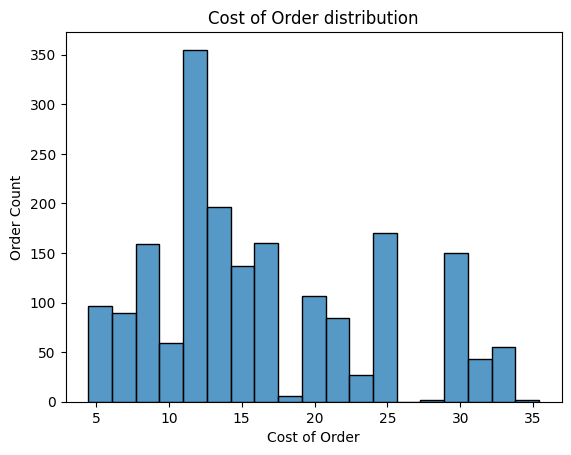

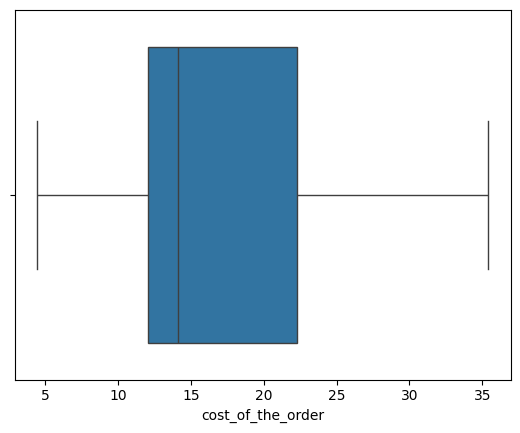

In [ ]:
sns.histplot(df,x='cost_of_the_order')
plt.title("Cost of Order distribution")
plt.xlabel("Cost of Order")
plt.ylabel("Order Count")
plt.show()
sns.boxplot(df,x='cost_of_the_order')
plt.show()

# **Analyzing Rating**

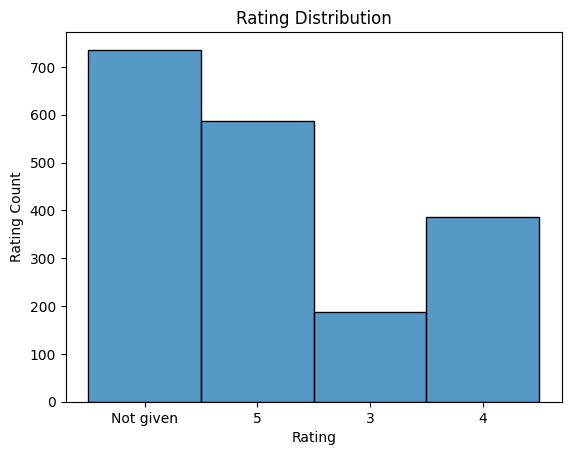

In [ ]:
sns.histplot(df,x='rating')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Rating Count")
plt.show()


## **Food Prep Time**

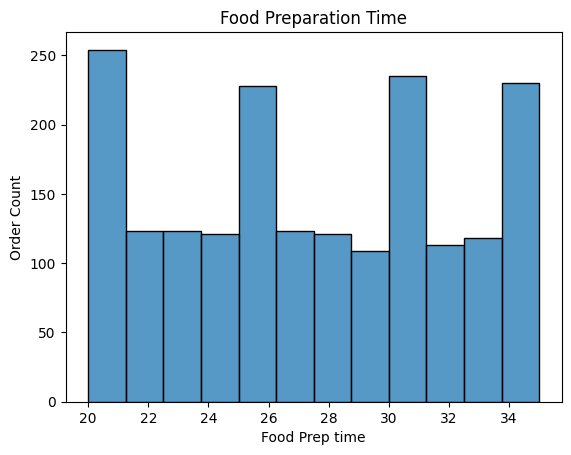

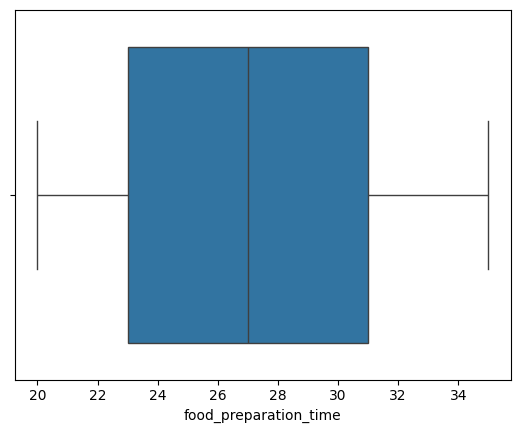

In [ ]:
sns.histplot(df,x='food_preparation_time')
plt.title("Food Preparation Time")
plt.xlabel("Food Prep time")
plt.ylabel("Order Count")
plt.show()
sns.boxplot(df,x='food_preparation_time')
plt.show()

# **Delivery Time**

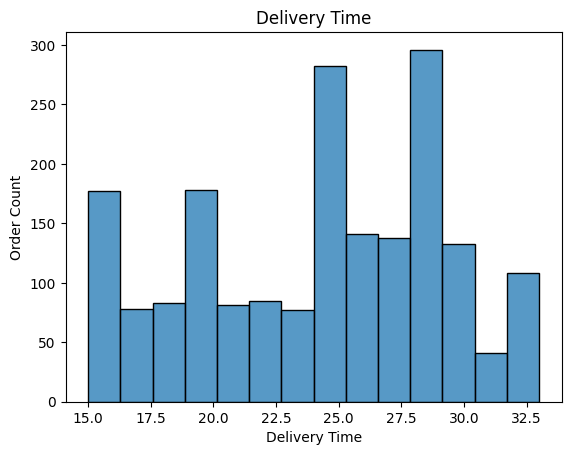

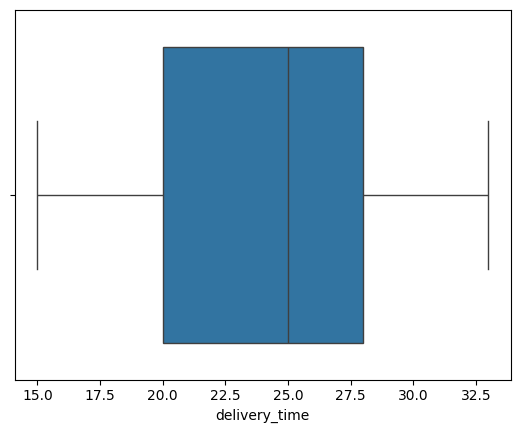

In [ ]:
sns.histplot(df,x='delivery_time')
plt.title("Delivery Time")
plt.xlabel("Delivery Time")
plt.ylabel("Order Count")
plt.show()
sns.boxplot(df,x='delivery_time')
plt.show()

# Analyze Restaurant **name**

In [ ]:
top_ten=pd.DataFrame(df.groupby(['restaurant_name'])['order_id'].count().sort_values(ascending=False).reset_index().head(10))
top_ten
top_ten.rename(columns = {'order_id':'Orders'}, inplace = True)

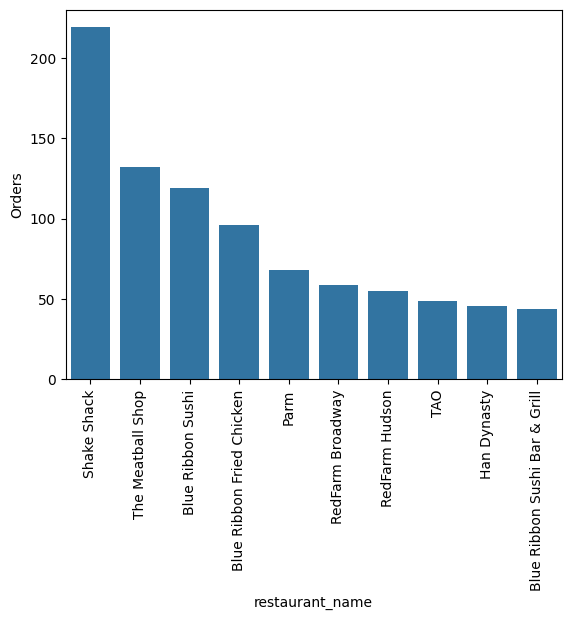

In [ ]:
sns.barplot(top_ten,x='restaurant_name',y='Orders')
plt.xticks(rotation=90)
plt.show()

# **Analyzing Cuisine Type**

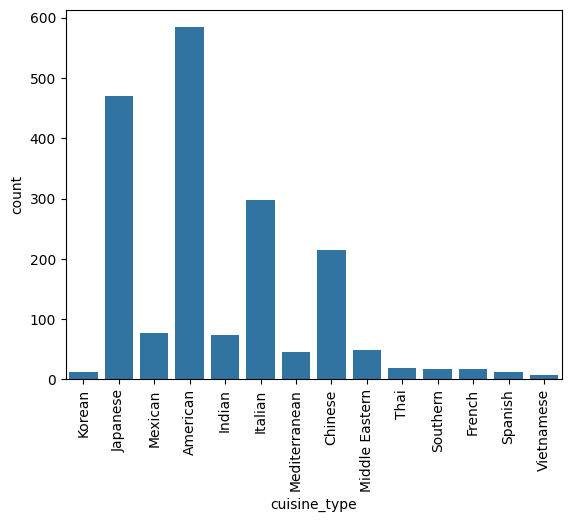

In [ ]:
sns.countplot(df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

# **Analyzing Days of the week**

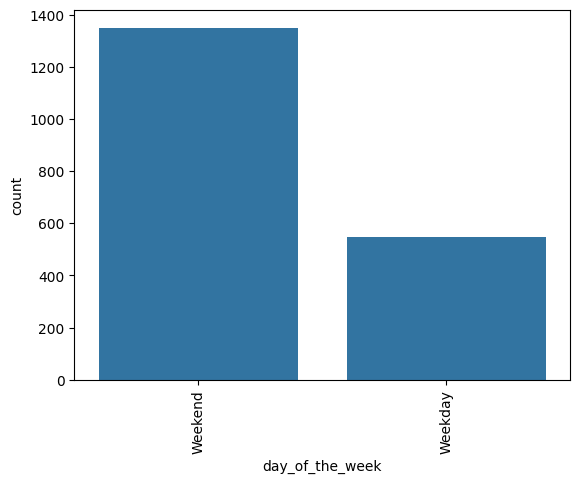

In [ ]:
sns.countplot(df,x='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

In [ ]:
df.groupby(['day_of_the_week'])['cuisine_type'].value_counts(ascending=False)

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
df.loc[df['cost_of_the_order']>20.00,'order_id'].count()/df.shape[0]*100

29.24130663856691

#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [6]:
df.groupby(['customer_id','order_id']).value_counts()

customer_id  order_id  restaurant_name                        cuisine_type  cost_of_the_order  day_of_the_week  rating     food_preparation_time  delivery_time
1311         1477236   Chipotle Mexican Grill $1.99 Delivery  Mexican       16.10              Weekend          Not given  22                     26               1
5139         1477855   Sushi of Gari 46                       Japanese      22.26              Weekend          5          28                     22               1
5444         1477357   Go! Go! Curry!                         Japanese      20.18              Weekend          3          22                     29               1
5693         1478155   The Meatball Shop                      Italian       8.30               Weekday          Not given  29                     32               1
6987         1477113   Hill Country Fried Chicken             Southern      12.23              Weekday          4          20                     29               1
               

In [ ]:
df[df['customer_id']==52832]
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

1) Analyzing orders that are not rated

In [29]:
not_rated = df[df['rating'].isnull()]
nr_rest=not_rated['restaurant_name']
nr_rest

0                          Hangawi
1        Blue Ribbon Sushi Izakaya
6                The Meatball Shop
10      Big Wong Restaurant _¤¾Ñ¼
14          Lucky's Famous Burgers
                   ...            
1887                   Shake Shack
1891                   Shake Shack
1892                   Han Dynasty
1895             Blue Ribbon Sushi
1897             Blue Ribbon Sushi
Name: restaurant_name, Length: 736, dtype: object

In [ ]:
not_rated.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,736.00,1477457.38,548.11,1476551.00,1476971.25,1477449.00,1477925.50,1478441.00
customer_id,736.00,169951.23,112404.91,1311.00,79245.00,128600.00,263669.25,405334.00
cost_of_the_order,736.00,16.09,7.33,4.66,11.83,14.07,21.50,34.19
rating,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,736.00,27.36,4.56,20.00,23.00,27.00,31.00,35.00
delivery_time,736.00,24.17,5.04,15.00,20.00,25.00,28.00,33.00
total_time,736.00,51.53,6.94,35.00,47.00,52.00,56.00,68.00


In [ ]:
not_rated['cuisine_type'].value_counts()

American          216
Japanese          197
Italian           126
Chinese            82
Mexican            29
Indian             23
Middle Eastern     15
Mediterranean      14
Thai               10
French              8
Spanish             6
Korean              4
Southern            4
Vietnamese          2
Name: cuisine_type, dtype: int64

In [ ]:
not_rated['restaurant_name'].unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'The Meatball Shop',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', "Lucky's Famous Burgers",
       'Sushi of Gari', 'Shake Shack', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', '5 Napkin Burger', 'TAO', 'Sushi Samba',
       'Cafeteria', 'Blue Ribbon Fried Chicken', 'Bistango',
       'RedFarm Broadway', 'Blue Ribbon Sushi Bar & Grill',
       'Westville Hudson', 'Osteria Morini', 'Parm', 'RedFarm Hudson',
       "Xi'an Famous Foods", 'Cafe Habana', 'Bareburger',
       'Yama Japanese Restaurant', 'Five Guys Burgers and Fries',
       'Balthazar Boulangerie', 'CafÌ© China', 'Blue Ribbon Sushi',
       'Benihana', 'The Kati Roll Company', 'Five Leaves', 'indikitch',
       'Prosperity Dumpling', 'Momoya', 'Han Dynasty', 'Mission Cantina',
       'Delicatessen', "Sarabeth's East", "S'MAC", 'Pepe Rosso To Go',
       'Donburi-ya', "Vanessa's Dumplings",
       'Tarallucci e Vino Re

#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
df.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24,49
5,1477224,147468,Tamarind TriBeCa,Indian,25.220,Weekday,3,20,24,44
6,1477894,157711,The Meatball Shop,Italian,6.070,Weekend,Not given,28,21,49
7,1477859,89574,Barbounia,Mediterranean,5.970,Weekday,3,33,30,63
8,1477174,121706,Anjappar Chettinad,Indian,16.440,Weekday,5,21,26,47
9,1477311,39705,Bukhara Grill,Indian,7.180,Weekday,5,29,26,55


In [ ]:
df['total_time']= df['food_preparation_time'] + df['delivery_time']

<ipython-input-66-fb672e9fcf3b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)


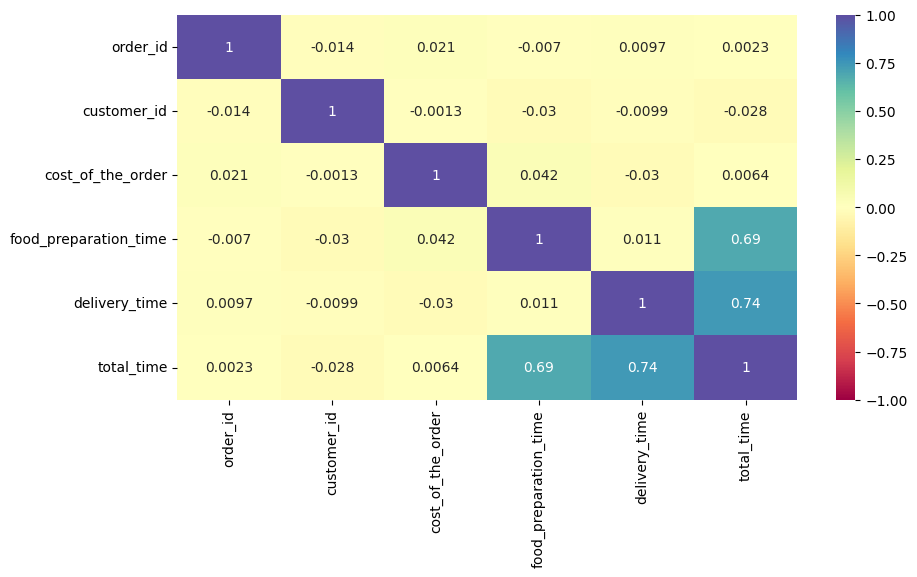

In [ ]:
# Write the code here
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

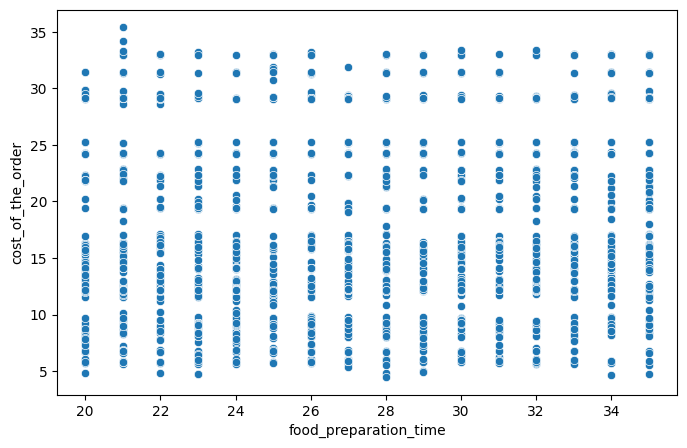

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(df,x='food_preparation_time',y='cost_of_the_order')
plt.show()

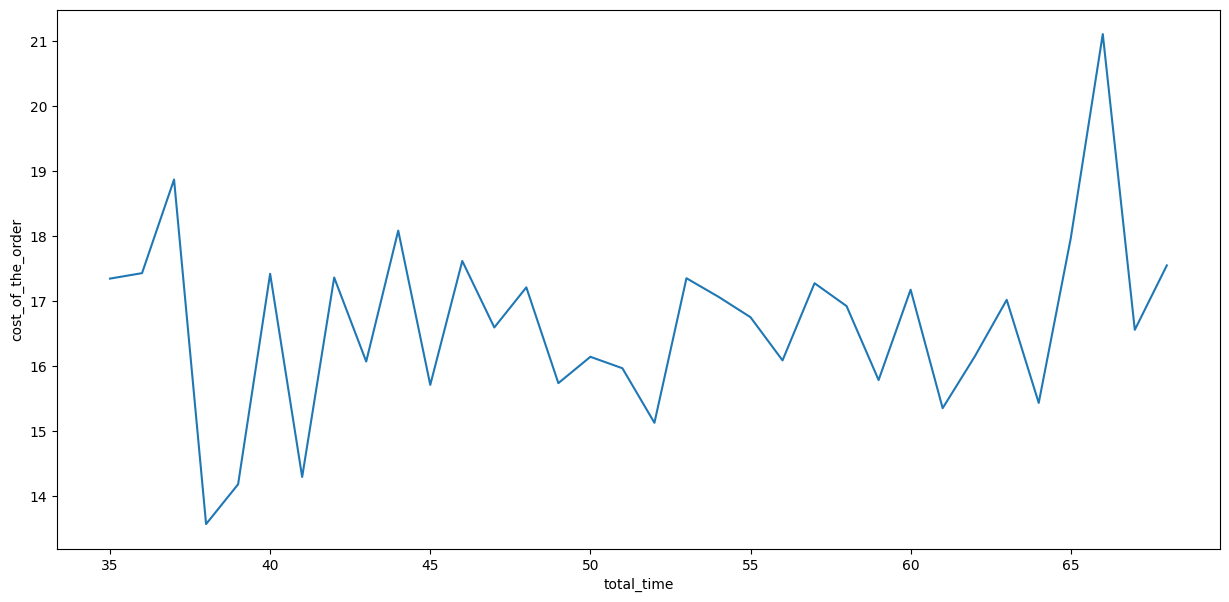

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(df, x='total_time', y ='cost_of_the_order', errorbar=None)
plt.show()

<ipython-input-57-56cf78f2f2a0>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(df, x='food_preparation_time', y ='cost_of_the_order', ci=None)


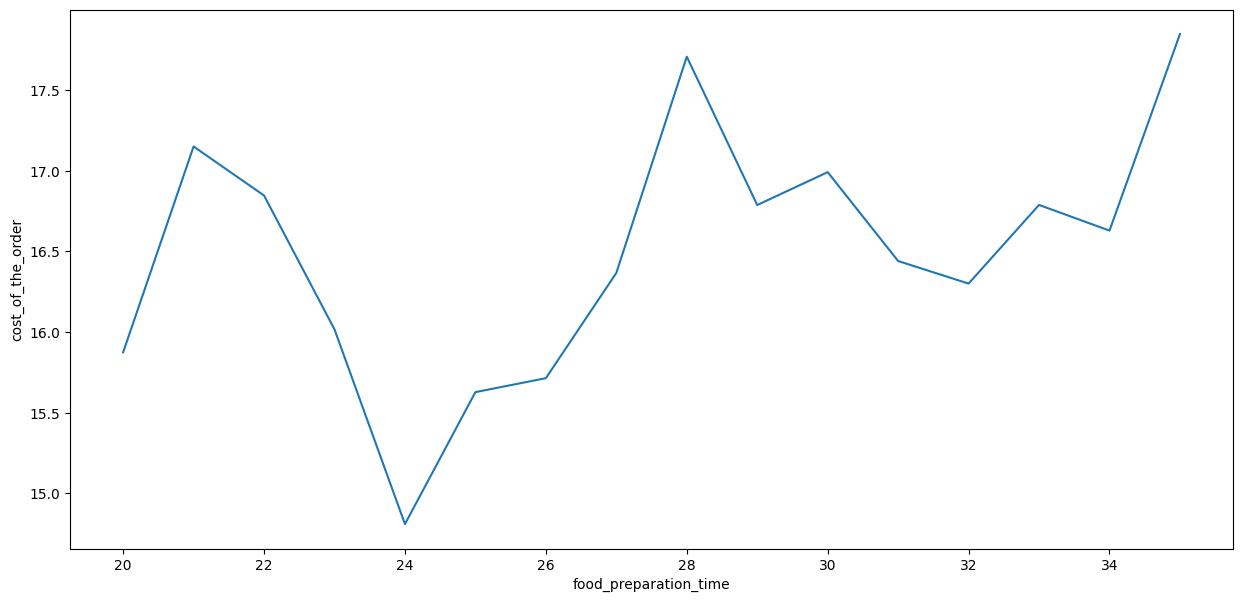

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(df, x='food_preparation_time', y ='cost_of_the_order', ci=None)
plt.show()

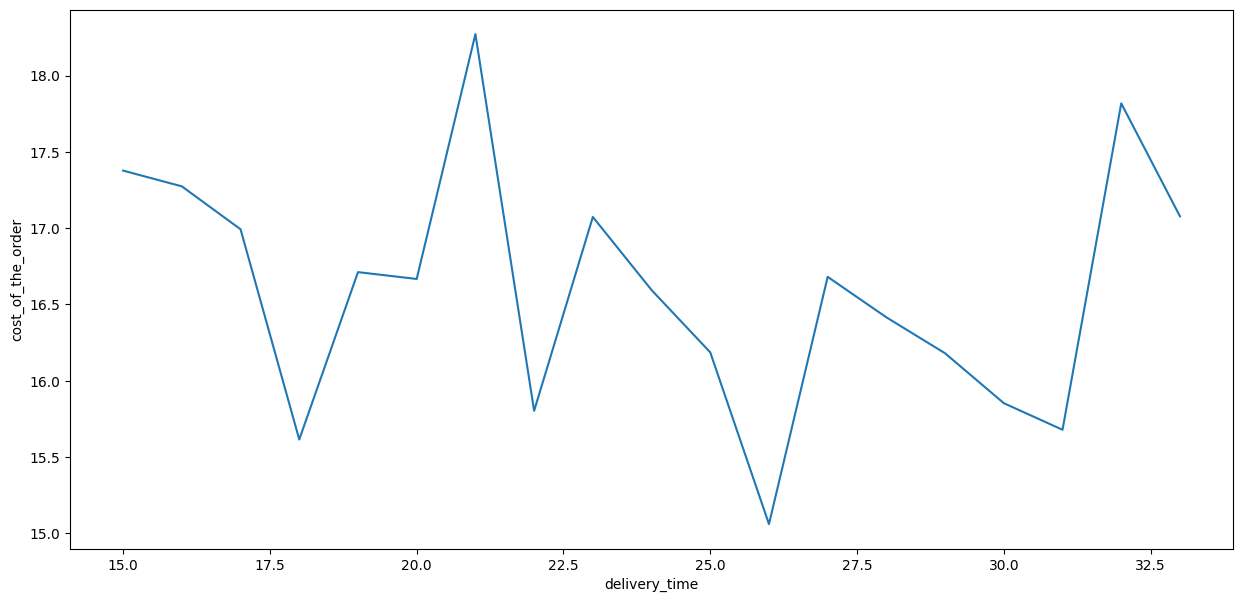

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(df, x='delivery_time', y ='cost_of_the_order',errorbar=None)
plt.show()

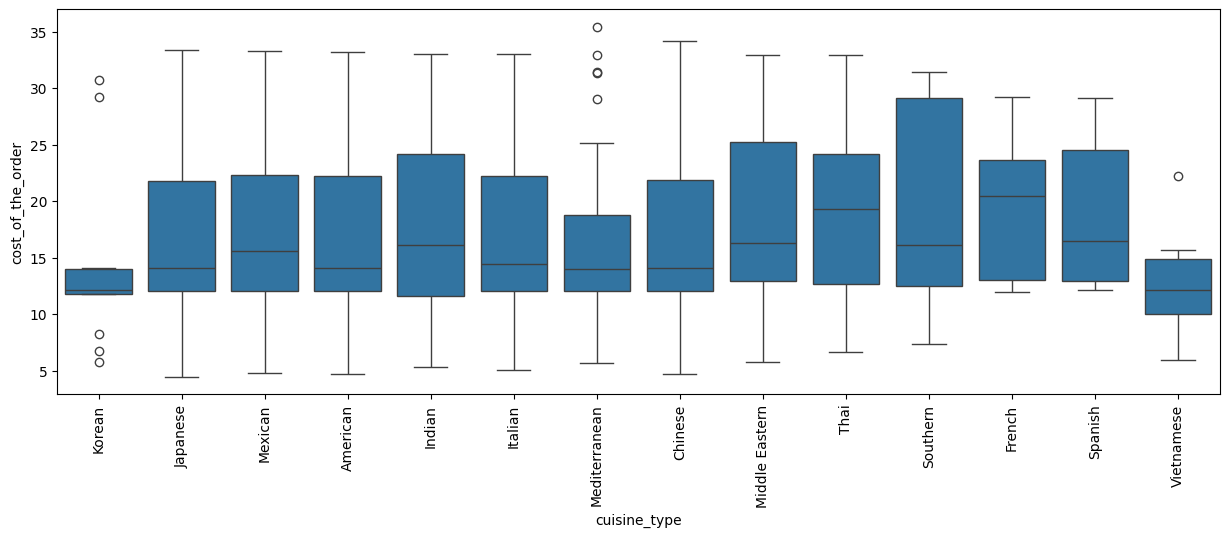

In [54]:
plt.figure(figsize=(15,5))
sns.boxplot(df,x='cuisine_type',y='cost_of_the_order') # turning off outliers
plt.xticks(rotation=90)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
df.loc[df['rating'].notnull()].groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index().head(6)

,restaurant_name,rating
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68
5,RedFarm Broadway,59


In [ ]:
rest_count=df.groupby(['restaurant_name'])[['rating']].count().sort_values(by='rating',ascending=False).reset_index()
rest_count

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
...,...,...
173,Market Table,0
174,Paul & Jimmy's,0
175,Room Service,0
176,Rohm Thai,0


In [ ]:
rest_names=rest_count[rest_count['rating']>50]['restaurant_name']
rest_names

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object

In [ ]:
df_new=df[df['restaurant_name'].isin(rest_names)]
df_new.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False)

restaurant_name
The Meatball Shop           4.512
Blue Ribbon Fried Chicken   4.328
Shake Shack                 4.278
Blue Ribbon Sushi           4.219
Name: rating, dtype: float64

In [ ]:
filter.head(10)

,rating
restaurant_name,
Shake Shack,133
The Meatball Shop,84
Blue Ribbon Sushi,73
Blue Ribbon Fried Chicken,64
RedFarm Broadway,41
Parm,39
RedFarm Hudson,34
TAO,28
Rubirosa,24


In [ ]:
mean=filter[filter['rating']>50]

TypeError: 'type' object is not subscriptable

In [ ]:
mean.groupby(['restaurant_name'])['rating'].mean().sort_values

restaurant_name
Blue Ribbon Fried Chicken    64.000
Blue Ribbon Sushi            73.000
Shake Shack                 133.000
The Meatball Shop            84.000
Name: rating, dtype: float64

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [32]:
#First we write a function for computing revenue per row
def revenue(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0
#Applying the function on each row of the original dataframe
df['Revenue'] = df['cost_of_the_order'].apply(revenue)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,7.69
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,1.81
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.00,23,28,1.83
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.00,25,15,7.30
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.00,25,24,1.74


In [42]:
#Total Revenue
total_revenue=df['Revenue'].sum()

print("The total net revenue is :","$",(total_revenue))

The total net revenue is : $ 6166.303


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df[df['total_time']>60]['order_id'].count()/df.shape[0]*100

10.537407797681771

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
df.groupby(['day_of_the_week'])[['delivery_time','food_preparation_time']].mean()

,delivery_time,food_preparation_time
day_of_the_week,,
Weekday,28.34,27.21
Weekend,22.47,27.44


In [ ]:
df[df['cuisine_type']== 'Indian'][['rating','delivery_time']].mean()

rating           4.54
delivery_time   24.08
dtype: float64

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---